# Classification and Regression with `aeon`

Required for this notebook:

In [ ]:
!pip install aeon==1.1.0 matplotlib seaborn statsmodels

In [2]:
# Ignore warnings, mainly for deprecations
import warnings

warnings.filterwarnings("ignore")

## Time Series Classification

In [3]:
from aeon.benchmarking.results_loaders import get_estimator_results_as_array
from aeon.classification.convolution_based import MiniRocketClassifier
from aeon.classification.hybrid import HIVECOTEV2
from aeon.datasets import load_classification
from aeon.visualisation.series._collections import plot_collection_by_class
from aeon.visualisation.results._scatter import plot_pairwise_scatter
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score

In [4]:
X_train, y_train = load_classification("ArrowHead", split="TRAIN")
X_test, y_test = load_classification("ArrowHead", split="TEST")
print(f"Train shape: {X_train.shape} {y_train.shape}")
print(f"Test shape: {X_test.shape} {y_test.shape}")

Train shape: (36, 1, 251) (36,)
Test shape: (175, 1, 251) (175,)


(<Figure size 1200x900 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >], dtype=object))

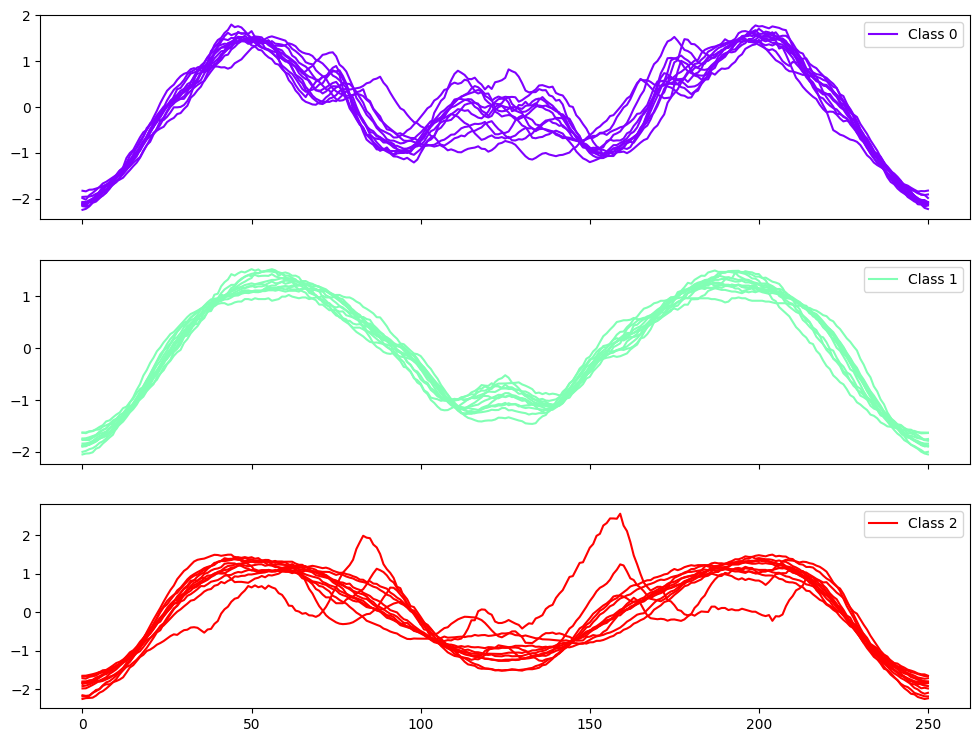

In [5]:
plot_collection_by_class(X_train, y_train)

### Traditional Classifiers

In [6]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train.squeeze(), y_train)
predictions = rf.predict(X_test.squeeze())
accuracy_score(y_test, predictions)

0.6971428571428572

In [7]:
rc = RidgeClassifier(random_state=0)
rc.fit(X_train.squeeze(), y_train)
predictions = rc.predict(X_test.squeeze())
accuracy_score(y_test, predictions)

0.7085714285714285

### Time Series Classifiers

In [8]:
mrh = MiniRocketClassifier(random_state=0)
mrh.fit(X_train, y_train)
predictions = mrh.predict(X_test)
accuracy_score(y_test, predictions)

0.8628571428571429

In [9]:
hc2 = HIVECOTEV2(
    stc_params = {"n_shapelet_samples": 500},
    drcif_params = {"n_estimators": 50},
    arsenal_params = {"n_kernels": 500},
    tde_params = {
        "n_parameter_samples": 75,
        "max_ensemble_size": 20,
    },
    random_state=0,
)
hc2.fit(X_train, y_train)
predictions = hc2.predict(X_test)
accuracy_score(y_test, predictions)

0.88

### Loaded Results

In [10]:
cls = ["HC2", "MiniROCKET"]
data = ["Chinatown", "Adiac", "ArrowHead", "GunPoint", "ItalyPowerDemand", "EthanolLevel"]
results, name = get_estimator_results_as_array(estimators=cls, datasets=data)
print(name)
print(results)

['Chinatown', 'Adiac', 'ArrowHead', 'GunPoint', 'ItalyPowerDemand', 'EthanolLevel']
[[0.98250729 0.98250729]
 [0.8056266  0.81585678]
 [0.86857143 0.86285714]
 [1.         0.99333333]
 [0.96987366 0.96307094]
 [0.676      0.578     ]]


(<Figure size 800x800 with 1 Axes>,
 <Axes: xlabel='MiniROCKET accuracy\n(mean: 0.8659)', ylabel='HC2 accuracy\n(mean: 0.8838)'>)

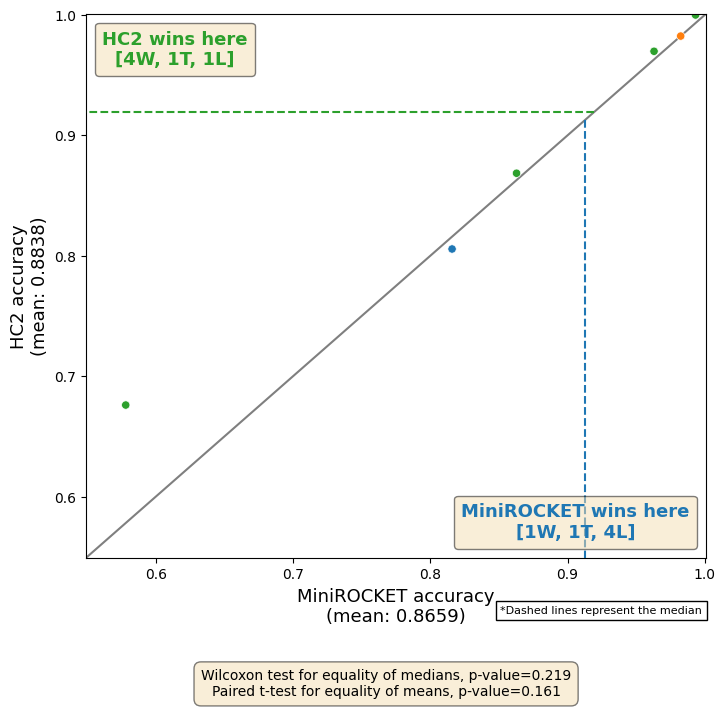

In [11]:
plot_pairwise_scatter(results[:, 0], results[:, 1], "HC2", "MiniROCKET")

## Time Series (Extrinsic) Regression

In [12]:
from aeon.regression.interval_based import DrCIFRegressor
from aeon.regression.hybrid import RISTRegressor
from aeon.datasets import load_regression
from aeon.visualisation.series._collections import plot_series_collection
from aeon.visualisation.results._scatter import plot_scatter_predictions
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import root_mean_squared_error
from sklearn.utils import check_random_state


In [13]:
X_train, y_train = load_regression("DhakaHourlyAirQuality", split="TRAIN")
X_test, y_test = load_regression("DhakaHourlyAirQuality", split="TEST")
print(f"Train shape: {X_train.shape} {y_train.shape}")
print(f"Test shape: {X_test.shape} {y_test.shape}")

Train shape: (1447, 1, 24) (1447,)
Test shape: (621, 1, 24) (621,)


In [14]:
rng = check_random_state(0)
train_subset = rng.choice(X_train.shape[0], 300, replace=False)
test_subset = rng.choice(X_test.shape[0], 300, replace=False)
X_train = X_train[train_subset]
y_train = y_train[train_subset]
X_test = X_test[test_subset]
y_test = y_test[test_subset]
print(f"Train shape: {X_train.shape} {y_train.shape}")
print(f"Test shape: {X_test.shape} {y_test.shape}")

Train shape: (300, 1, 24) (300,)
Test shape: (300, 1, 24) (300,)


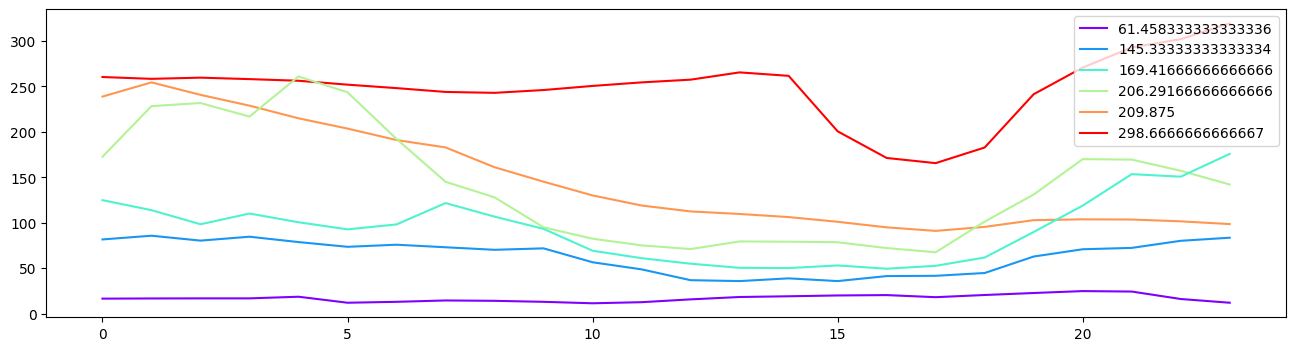

In [15]:
_, _ = plot_series_collection(X_train[:6], y_train[:6])

### Traditional Regressors

In [16]:
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train.squeeze(), y_train)
predictions = rf.predict(X_test.squeeze())
root_mean_squared_error(y_test, predictions)

7.920786592444928

In [17]:
ri = Ridge(random_state=0)
ri.fit(X_train.squeeze(), y_train)
predictions = ri.predict(X_test.squeeze())
root_mean_squared_error(y_test, predictions)

12.801425283177723

(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='Actual values', ylabel='Predicted values'>)

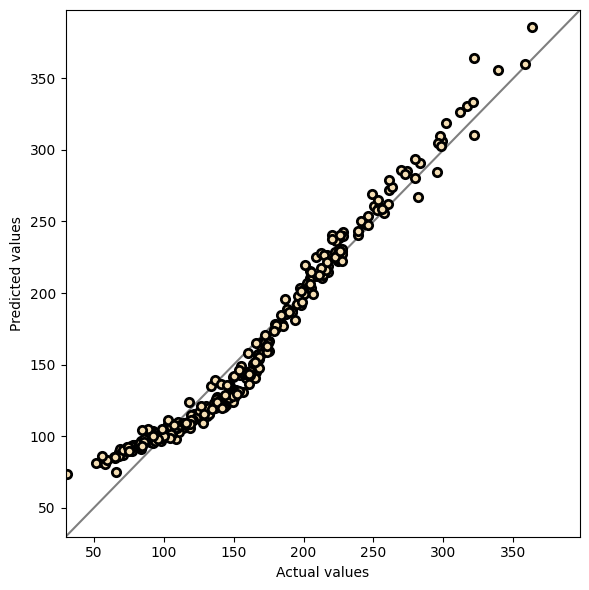

In [18]:
plot_scatter_predictions(y_test, predictions)

### Time Series Regressors

In [19]:
drcif = DrCIFRegressor(n_estimators=50, random_state=0)
drcif.fit(X_train, y_train)
predictions = drcif.predict(X_test)
root_mean_squared_error(y_test, predictions)

6.212623952485785

In [20]:
rist = RISTRegressor(n_intervals=50, n_shapelets=200, random_state=0)
rist.fit(X_train, y_train)
predictions = rist.predict(X_test)
root_mean_squared_error(y_test, predictions)

4.638741227632639

(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='Actual values', ylabel='Predicted values'>)

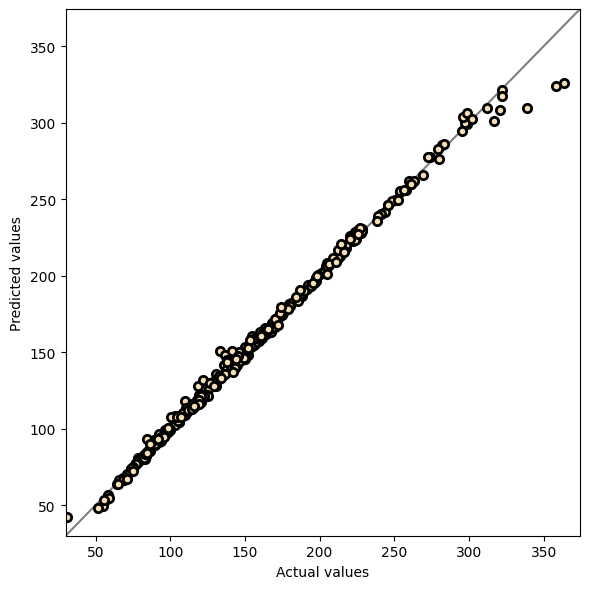

In [21]:
plot_scatter_predictions(y_test, predictions)